In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [2]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

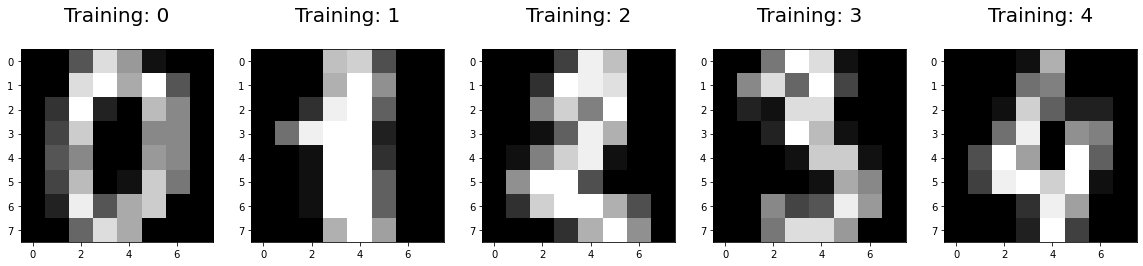

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])
print(X_train.shape)

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1
(1347, 64)


In [5]:
import math
from numpy import inf
# 3.2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate):
    STEP_NUMBER = 1000
    REG_PARAM = 0.1
    #print("------- Init --------")
    # y: One-hot coding
    y = (np.arange(np.max(y_train) + 1) == y_train[:, None]).astype(float)
    n_class = y.shape[1]
    n_features = X_train.shape[1]
    n_train = X_train.shape[0]
    print("y_train shape", y_train.shape)
    print("y shape after one hot coding", y.shape)
    #print("X_train shape: ", X_train.shape) # 64 features

    # Weight: size --> number of feature * number of class
    W = np.zeros(shape=(n_features,n_class))
    #print("wieght shape", W.shape)
    
    # bias : size 1*(number of class)
    b = [0.01 for _ in range(n_class)]
    
    # Z = WX + b: number of trainng * number of class
    Z = X_train.dot(W) + b
    #print("Z shape", Z.shape)
    
    # Softmax Z' = Z-maxZ(inClass), size: number of trainng * number of class
    Z_prime = Z - np.amax(Z, axis=1).reshape(n_train,1)
    #print("Z_prime shape",Z_prime.shape)
    
    # softmax = e^z/ sum of each class e^z
    softmax = (np.exp(Z_prime.T) / np.sum(np.exp(Z_prime), axis=1)).T
    #print("softmax shape",softmax.shape)
    
    # Cross entryophy
    cross_entrophy = -1*np.sum(np.log(softmax) * (y), axis=1)
    #print("cross_entrophy shape", cross_entrophy.shape)
    
    #Cost 
    loss = np.mean(cross_entrophy)
    #print("cost :",loss)
    
    #Classified Z
    pred_class = Z_prime.argmax(axis=1)
    
    #print("------- Gradient Descent --------")
    loss_list = []
    e = 100
    n_iter =0
    while( (e>1.0e-4) and (n_iter<STEP_NUMBER)): 
    #while((e>1.0e-2) and (n_iter<STEP_NUMBER)): # Converge is too slow so modified to 10e-2
        #n_iter += 1
        # W_derivative = 1/n * Singma( Xi*(Output - target))
        W_derivative = np.ones(shape=W.shape)
        X = np.ones(shape=X_train.shape)
        diff = softmax-y
        for i in range(n_class):
            for j in range(n_train):
                X[j,:] = X_train[j,:].dot(diff[j][i])
                W_derivative[:,i] = np.sum(X, axis=0)       
        #W = W-W_derivative*(learning_rate) # Vanila
        W = W*(1-learning_rate*REG_PARAM/n_train)-W_derivative*(learning_rate) #Reg
         
            
        # b <= bj - learingRate*(1/n*Singma(softmax-target))
        b_derivative = (1/n_train)*np.sum(diff, axis=0)
        b = b - learning_rate*b_derivative
        #print(b)
        
        # Z = WX + b: number of trainng * number of class
        Z = X_train.dot(W) + b
        # Softmax Z' = Z-maxZ(inClass), size: number of trainng * number of class
        Z_prime = Z - np.amax(Z, axis=1).reshape(n_train,1)
        # softmax = e^z/ sum of each class e^z
        softmax = (np.exp(Z_prime.T) / np.sum(np.exp(Z_prime), axis=1)).T
        
        #loss
        #cross_entrophy = -1*np.sum( np.log(softmax)*(y), axis=1)
        #loss_per_train = np.zeros(shape=(n_train,1))
        loss_per_train = np.full((n_train,1), np.inf)
        for i in range(n_train):
            #loss_per_train[i] = -1*(np.log(softmax))[i,:].dot(y[i,:].T)
            index_one = (np.where(y[i,:] == 1))[0]
            loss_per_train[i] = -1*np.log(softmax)[i][index_one]
            loss_per_train[loss_per_train == inf] = 9223372036854775806
        #loss = np.mean(loss_per_train) # Vanila
        loss = np.mean(loss_per_train) + 0.5*REG_PARAM*np.sum(np.square(W)) #Reg
        loss_list.append(loss)
        if np.size(loss_list) > 2:
            e = abs(loss_list[-1]-loss_list[-2])
        
    #Classified Z
    pred_class = Z_prime.argmax(axis=1)
    
    return W, b, loss_list
    

Problem4-b
---------------------------------------
learning rate = 0.05
y_train shape (1347,)
y shape after one hot coding (1347, 10)


/Users/Hanna/opt/anaconda3/envs/myenv_python3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log


KeyboardInterrupt: 

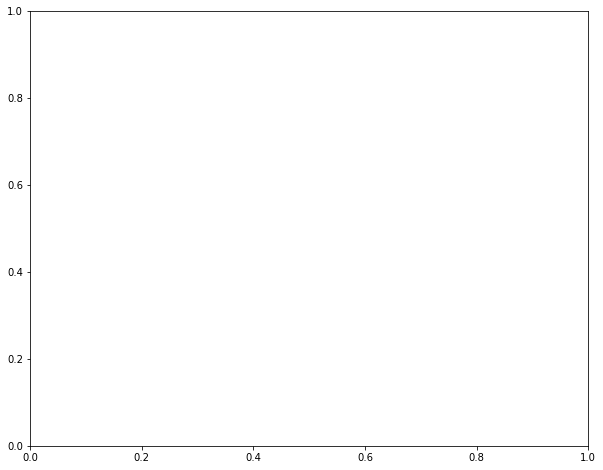

In [6]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
#learning_rate = [5.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
print("Problem4-b")
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print("learning rate =", learning_rate[i])
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    
    #TODO
    Z_train = X_train.dot(W) + b # Z = WX + b:
    pred_train = Z_train.argmax(axis=1) #Classified Z
    acc_train = (pred_train == y_train).sum() / X_train.shape[0]
    print("training precision =", acc_train)

    #TODO
    Z_test = X_test.dot(W) + b # Z = WX + b:
    pred_test = Z_test.argmax(axis=1) #Classified Z
    acc_test = (pred_test == y_test).sum() / X_test.shape[0]
    print("test precision =", acc_test)
    print("number of iteration: ",np.size(loss_GD))
    
    plt.plot(loss_GD, c=cl[i], ls='-', marker='o', label='batch gradient descent (lr=' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

print("Problem4-c")
print("Q)Compare the convergence curves: What are the pro and cons or large and small rates?")
print(" --> Small rate: takes longer time to converge but cost error became really small finding the optimal solution")
print(" --> Large rate: Fast converge, but has possibility to overshooting. It might be near the optimal solution but it might never get to the optimal point hoovering near the point.")

In [7]:
# 3.3 stochastic gradient descent (SGD) for Logistic regression
#def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
def LogisticRegression_SGD(X_train, y_train, batch_size, learning_rate=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):

    #TODO: initialization
    notstop = True
    epoch = 0
    REG_PARAM = 0.1
    
    y = (np.arange(np.max(y_train) + 1) == y_train[:, None]).astype(float)
    n_class = y.shape[1]
    n_features = X_train.shape[1]
    n_train = X_train.shape[0]

    # Weight: size --> number of feature * number of class
    W = np.zeros(shape=(n_features,n_class))
    
    # bias : size 1*(number of class)
    b = [0.01 for _ in range(n_class)]
    
    # Z = WX + b: number of trainng * number of class
    Z = X_train.dot(W) + b
    
    # Softmax Z' = Z-maxZ(inClass), size: number of trainng * number of class
    Z_prime = Z - np.amax(Z, axis=1).reshape(n_train,1)
    
    # softmax = e^z/ sum of each class e^z
    softmax = (np.exp(Z_prime.T) / np.sum(np.exp(Z_prime), axis=1)).T
    
    # Cross entryophy
    cross_entrophy = -1*np.sum(np.log(softmax) * (y), axis=1)
    
    #Cost 
    loss = np.mean(cross_entrophy)
    
    #Classified Z
    pred_class = Z_prime.argmax(axis=1)
    
    #print("------- Gradient Descent --------")
    loss_list = []
    e = 100
    n_iter =0
    
    # optimization loop	
    while notstop and epoch < max_epoch:        
        #TODO: SGD of each epoch
        
        # Number of mini-batch
        n_batch = math.floor(n_train/batch_size)
        
        # W_derivative = 1/n * Singma( Xi*(Output - target))
        W_derivative = np.ones(shape=W.shape)
        X = np.ones(shape=X_train.shape)
        diff = softmax-y
        for k in range(n_batch):
            for i in range(n_class):
                for j in range(batch_size):
                    X[k*j,:] = X_train[k*j,:].dot(diff[k*j][i]) # update batch size W
                    W_derivative[:,i] = np.sum(X, axis=0)       
        #W = W-W_derivative*(learning_rate) # Vanila
        W = W*(1-learning_rate*REG_PARAM/n_train)-W_derivative*(learning_rate) #Reg
        
        # b <= bj - learingRate*(1/n*Singma(softmax-target))
        b_derivative = (1/n_train)*np.sum(diff, axis=0)
        b = b - learning_rate*b_derivative
        #print(b)
        
        # Z = WX + b: number of trainng * number of class
        Z = X_train.dot(W) + b
        # Softmax Z' = Z-maxZ(inClass), size: number of trainng * number of class
        Z_prime = Z - np.amax(Z, axis=1).reshape(n_train,1)
        # softmax = e^z/ sum of each class e^z
        softmax = (np.exp(Z_prime.T) / np.sum(np.exp(Z_prime), axis=1)).T
        
        
        #loss
        loss_per_train = np.full((n_train,1), np.inf)
        for i in range(n_train):
            #loss_per_train[i] = -1*(np.log(softmax))[i,:].dot(y[i,:].T)
            index_one = (np.where(y[i,:] == 1))[0]
            loss_per_train[i] = -1*np.log(softmax)[i][index_one]
            loss_per_train[loss_per_train == inf] = 9223372036854775806
        #loss = np.mean(loss_per_train) # Vanila
        loss = np.mean(loss_per_train) + 0.5*REG_PARAM*np.sum(np.square(W)) #Reg
        loss_list.append(loss)
        if np.size(loss_list) > 2:
            e = abs(loss_list[-1]-loss_list[-2])
        
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss_list[epoch - 10] <= loss_list[epoch] - eps:
                learning_rate *= 0.5
                print("reduce learning rate to", learning_rate)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss_list[epoch - 20] <= loss_list[epoch] - eps or abs(loss_list[epoch] - loss_list[epoch-1]) <= eps:                
                notstop = False
                break
        
        epoch += 1

    return (W, b, loss_list)

Problem4-d
 case1) When the same initial learing rate is used
---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
reduce learning rate to 1.953125e-05
reduce learning rate to 9.765625e-06
reduce learning rate to 4.8828125e-06
training precision = 0.4647364513734224
test precision = 0.47333333333333333
number of iteration:  22
---------------------------------------
batch_size = 50


/Users/Hanna/opt/anaconda3/envs/myenv_python3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log


reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
reduce learning rate to 1.953125e-05
reduce learning rate to 9.765625e-06
reduce learning rate to 4.8828125e-06
training precision = 0.7861915367483296
test precision = 0.7822222222222223
number of iteration:  27
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
reduce learning rate to 1.953125e-05
reduce learning rate to 9.765625e-06
reduce learning rate to 4.8828125e-06
training precision = 0.8834446919079436
test precision = 0.8822222222222222
number of 

Text(0, 0.5, 'loss')

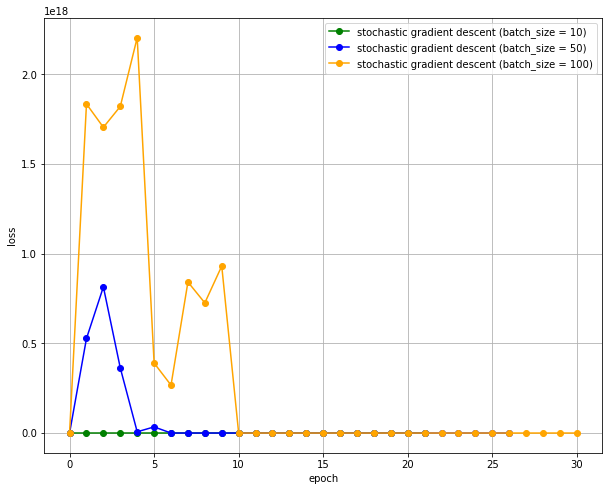

In [8]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [1.0e-2, 1.0e-2, 1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))

print("Problem4-d")
print(" case1) When the same initial learing rate is used")
for i in range(len(bs)):
    print("---------------------------------------")
    print("batch_size =", bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
  
    #TODO
    Z_train = X_train.dot(W) + b # Z = WX + b:
    pred_train = Z_train.argmax(axis=1) #Classified Z
    acc_train = (pred_train == y_train).sum() / X_train.shape[0]
    print("training precision =", acc_train)

    #TODO
    Z_test = X_test.dot(W) + b # Z = WX + b:
    pred_test = Z_test.argmax(axis=1) #Classified Z
    acc_test = (pred_test == y_test).sum() / X_test.shape[0]
    print("test precision =", acc_test)
    print("number of iteration: ",np.size(loss_SGD))
    
    plt.plot(loss_SGD, c = cl[i], ls='-', marker='o', label='stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')



 case2) When the tuned learing rate is used
---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
reduce learning rate to 1.953125e-05
reduce learning rate to 9.765625e-06
reduce learning rate to 4.8828125e-06
training precision = 0.4647364513734224
test precision = 0.47333333333333333
number of iteration:  22
---------------------------------------
batch_size = 50


/Users/Hanna/opt/anaconda3/envs/myenv_python3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log


reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
reduce learning rate to 0.0015625
reduce learning rate to 0.00078125
reduce learning rate to 0.000390625
reduce learning rate to 0.0001953125
reduce learning rate to 9.765625e-05
reduce learning rate to 4.8828125e-05
reduce learning rate to 2.44140625e-05
training precision = 0.8032665181885672
test precision = 0.8066666666666666
number of iteration:  32
---------------------------------------
batch_size = 100
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
reduce learning rate to 0.0015625
reduce learning rate to 0.00078125
reduce learning rate to 0.000390625
reduce learning rate to 0.0001953125
reduce learning rate to 9.765625e-05
reduce learning rate to 4.8828125e-05
training precision = 0.8878990348923533
test precision = 0.8733333333333333
number of it

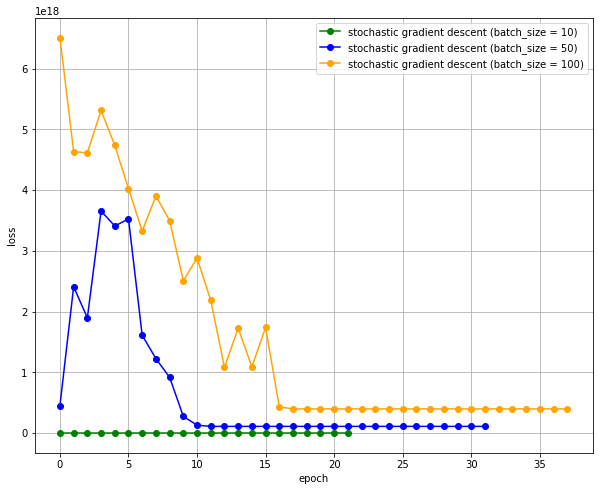

In [10]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [1.0e-2, 1.0e-2*5, 1.0e-2*10]
fig, ax = plt.subplots(figsize=(10, 8))

print(" case2) When the tuned learing rate is used")
for i in range(len(bs)):
    print("---------------------------------------")
    print("batch_size =", bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
  
    #TODO
    Z_train = X_train.dot(W) + b # Z = WX + b:
    pred_train = Z_train.argmax(axis=1) #Classified Z
    acc_train = (pred_train == y_train).sum() / X_train.shape[0]
    print("training precision =", acc_train)

    #TODO
    Z_test = X_test.dot(W) + b # Z = WX + b:
    pred_test = Z_test.argmax(axis=1) #Classified Z
    acc_test = (pred_test == y_test).sum() / X_test.shape[0]
    print("test precision =", acc_test)
    print("number of iteration: ",np.size(loss_SGD))
    
    plt.plot(loss_SGD, c = cl[i], ls='-', marker='o', label='stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

print("Problem4-e")
print("Q) Compare the convergence curve")
print(" --> The same learning rate for difference batch size shows slow convergance compared to the tuned learning rate")
print("Q) Some mathmatical explanation")
print(" --> If batch size is small, it takes baby step on gredient descent. It is disoriented someitmes but it found the global minima in the long run. Since it takes baby step it would be better to use small learning rate.")
print(" --> If batch size is large, it might be similar to batch in terms of size of step but little step with disoriented sometimes. Since it is little bit better orientation toward global minima for each batch, it it is safe to use larger learning rate")
print(" --> In both case, reducing learning rate near the optimal point is good idea, since it slow down to find the that point")
print("Q) What learning rate yielded the overall fastest convergence in terms of wall clock time? ")
print(" --> Bigger learning rate yielded the overall fastest convergence, but too big learning rate is risky becuase of possibility of oevershooting")

